In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [19]:
def plot_one_pval_TE_final(ax,run_list,main_enum,fname_pattern,pval_list,debug_tidx,rr_lambda,tmle_lambda,l2_lambda,plot_item_list,hlayer=None,num_sample=None,pvalt1=None):
    #Getting the metrics
    if pvalt1!=None:
        result_dict = get_all_result_dict(
                                run_list=run_list,
                                pval_list=pval_list,
                                enum=main_enum,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            "{0}",
                                                            pvalt1,
                                                            debug_tidx,
                                                            rr_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                )

        )
    elif hlayer!=None:
        result_dict = get_all_result_dict(
                                run_list=run_list,
                                pval_list=pval_list,
                                enum=main_enum,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            num_sample,
                                                            hlayer,
                                                            "{0}",
                                                            debug_tidx,
                                                            rr_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                )

        )
    else:
        result_dict = get_all_result_dict(
                                run_list=run_list,
                                pval_list=pval_list,
                                enum=main_enum,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            num_sample,
                                                            "{0}",
                                                            debug_tidx,
                                                            rr_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                )

        )
        
#     print(result_dict)
    
    #Plotting the result
    for pidx,plot_item in enumerate(plot_item_list):
        #Plotting the label correlation separately
        if plot_item=="predictive_correlation":
            
            _, labels = ax[pidx].get_legend_handles_labels()
            if "y-causal corr" not in labels:
                causal_corr_list = [result_dict[pval]["y-tcausal"]["mean"] for pval in pval_list]
                confound_corr_list = [result_dict[pval]["y-tconfound"]["mean"] for pval in pval_list]
                spurious_corr_list = [result_dict[pval]["y-tspurious"]["mean"] for pval in pval_list]

                ax[pidx].plot(causal_corr_list,marker="o",ls="-.",label="y-causal corr")
                ax[pidx].plot(spurious_corr_list,marker="o",ls="-.",label="y-spurious corr")
                ax[pidx].plot(confound_corr_list,marker="o",ls="-.",label="y-confound corr")

                ax[pidx].set_xlabel("expt")
                ax[pidx].set_ylabel(plot_item)

                ax[pidx].legend()
                ax[pidx].grid(True)
            
            continue
        
        #printing the mean
        
        #Plotting the results
        item_yval = np.array([result_dict[pval][plot_item]["mean"] for pval in pval_list])
        #yerr=[0.0]*len(item_yval)
        yerr = np.array([result_dict[pval][plot_item]["std"] for pval in pval_list])
        #Plotting the item
        
        if(pvalt1!=None):
            ax[pidx].plot(pval_list,item_yval,label="topic={}".format(debug_tidx),ls="-.",marker="o",alpha=0.7)
            ax[pidx].set_xlabel("predictive-correlation")
        else:
            ax[pidx].plot(range(len(pval_list)),item_yval,label="topic={}".format(debug_tidx),ls="-.",marker="o",alpha=0.7)
            ax[pidx].fill_between(range(len(pval_list)),item_yval-yerr,item_yval+yerr,alpha=0.3)
            ax[pidx].set_xlabel("expt")
        
        ax[pidx].set_ylabel(plot_item)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [32]:
def plot_one_pval_TE_timeline(ax,run_list,main_enum,fname_pattern,pval_list,debug_tidx,rr_lambda,tmle_lambda,l2_lambda,hlayer=None,num_sample=None,pvalt1=None):
    #Getting the metrics
    if pvalt1!=None:
        result_dict_timeline = get_all_result_timeline(
                                    run_list=run_list,
                                    pval_list=pval_list,
                                    fname_pattern=fname_pattern.format(
                                                                "{1}",
                                                                "{0}",
                                                                pvalt1,
                                                                debug_tidx,
                                                                rr_lambda,
                                                                tmle_lambda,
                                                                l2_lambda,
                                    )
        )
    elif hlayer!=None:
        result_dict_timeline = get_all_result_timeline(
                            run_list=run_list,
                            pval_list=pval_list,
                            fname_pattern=fname_pattern.format(
                                                        "{1}",
                                                        num_sample,
                                                        hlayer,
                                                        "{0}",
                                                        debug_tidx,
                                                        rr_lambda,
                                                        tmle_lambda,
                                                        l2_lambda,
                            )
        )
    else:
        result_dict_timeline = get_all_result_timeline(
                            run_list=run_list,
                            pval_list=pval_list,
                            fname_pattern=fname_pattern.format(
                                                        "{1}",
                                                        num_sample,
                                                        "{0}",
                                                        debug_tidx,
                                                        rr_lambda,
                                                        tmle_lambda,
                                                        l2_lambda,
                            )
        )

    for pidx,plot_item in enumerate(plot_item_list):
        for pval in pval_list:
            #Getting the timeline item
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"].tolist()
            yerr=[0.0]*len(item_pval_yval_timeline)
            xval = list(range(len(item_pval_yval_timeline)))

#             #Plotting the item
#             ax[pidx,debug_tidx].errorbar(xval[::2],item_pval_yval_timeline[::2],yerr[::2],label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
#             #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)

#             ax[pidx,debug_tidx].set_xlabel("epoch")
#             ax[pidx,debug_tidx].set_ylabel(plot_item)

#             ax[pidx,debug_tidx].legend()
#             ax[pidx,debug_tidx].grid(True)
            
            
            
            
            
            
            
            
            
            #Plotting the item
            ax[pidx,].errorbar(xval[::2],item_pval_yval_timeline[::2],yerr[::2],label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)

            ax[pidx,].set_xlabel("epoch")
            ax[pidx,].set_ylabel(plot_item)

            ax[pidx,].legend()
            ax[pidx,].grid(True)

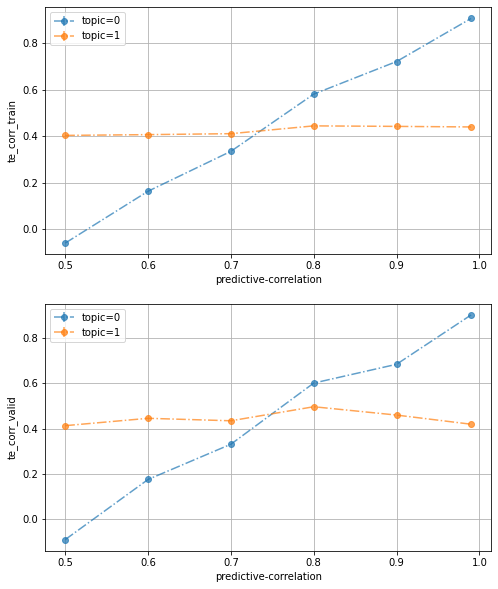

Bad pipe message: %s [b'0\x16\xd3\xf6\x0e=\x03|#\xbf\x88\xfd}gq\xfc!o \x05\x978\xbc\xe8\x8a>[\x94\x9f,\xdb~\xb6K\x80\xb5\xbb\xa88g\xb7\r\x1b\xfbX', b'\xdby\x88\xfb\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x89\x05l\xf9nk\x9dQ\x9d\x10\xca\xdb\xb5\x8e\xcft\x1bsM\x9e\x1a/\xa3\xa01\xc6\x1b\x00\xc1]']
Bad pipe message: %s [b"\xc7\x81VT\xb8Gd\xa1\xda\xe2{\x13\xf4cj_\x004\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\

In [61]:
run_list=[1,]
main_enum=12

rr_lambda=1
tmle_lambda=1
l2_lambda=1
debug_tidx_list=[0,1]

pvalt1=0.7
pvalt0_list=[0.5,0.6,0.7,0.8,0.9,0.99]


plot_item_list=[
#             "te_train",
            "te_corr_train",
#             "te_valid",
            "te_corr_valid",
#             "rr_loss",
#             "reg_loss",
#             "tmle_loss",
#             "l2_loss",
]


plt.rcParams['figure.figsize'] = [8, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),1)

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy2/nlp_logs/cad.s1riesz.rnum({}).pvalt0({}).pvalt1({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_final(ax=ax,
                           run_list=run_list,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvalt0_list,
                           pvalt1=pvalt1,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda
    )

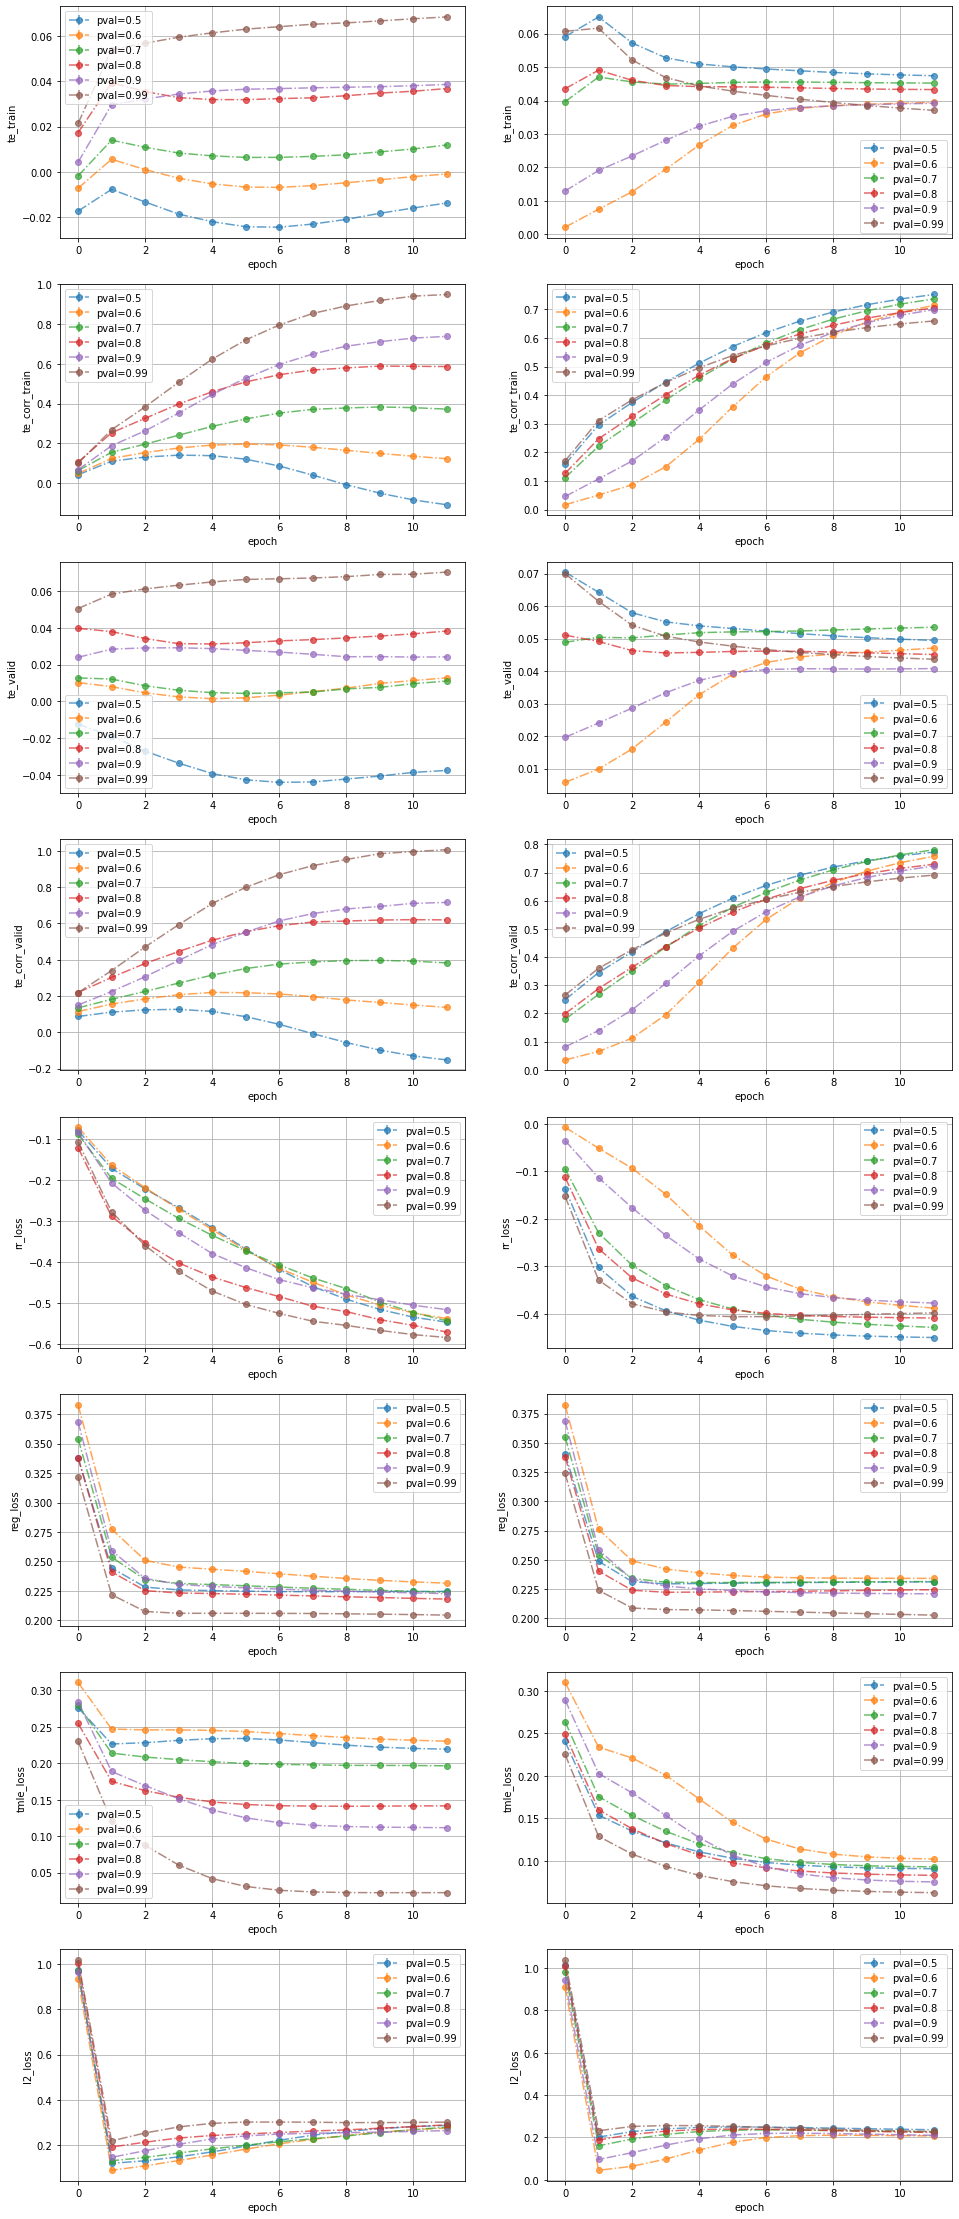

Bad pipe message: %s [b'`=*\xbe\xfax\xcd\x8f\x99\x80T\xc4\x18\xb9\x12\x8f5\xeb \xce\xf0\xc2\xaeO\xcfa\x8a\x95\xc8!\xf6w\xd0\x14']
Bad pipe message: %s [b'\x8f&\x90U\xb1\xd9A\xb3\x19\x858K\xf1O\x84\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00', b'\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07']
Bad pipe message: %s [b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'M\x04c\xff\x82\xaa\xceb\xf6\xd2~\nxIGD\xba\x02', b'\x80\x8e79z\xee\xca\x16~\x95?]\x1eI\xbc\r\xdb9\xaav\xa8N\xc63r;,,=E\x84']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xa2VA\xce[\xea\xdcLv\xdc\\#H\xe5\xf3\x17u\xc6@\x1d\x10\x13']
Bad pipe message: %s [b'\x9d\xd1\xb7\x06\xc6E\x0b\xce\xf5`\x9d\xb1\x9c\xf7,d$~\x

In [59]:
run_list=[1,]
main_enum=12

rr_lambda=1
tmle_lambda=1
l2_lambda=1
debug_tidx_list=[0,1]

pvalt1=0.9
pvalt0_list=[0.5,0.6,0.7,0.8,0.9,0.99]


plot_item_list=[
            "te_train",
            "te_corr_train",
            "te_valid",
            "te_corr_valid",
            "rr_loss",
            "reg_loss",
            "tmle_loss",
            "l2_loss",
]


plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(debug_tidx_list))

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy2/nlp_logs/cad.s1riesz.rnum({}).pvalt0({}).pvalt1({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvalt0_list,
                           pvalt1=pvalt1,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda
    )

## Toy Dataset 3 

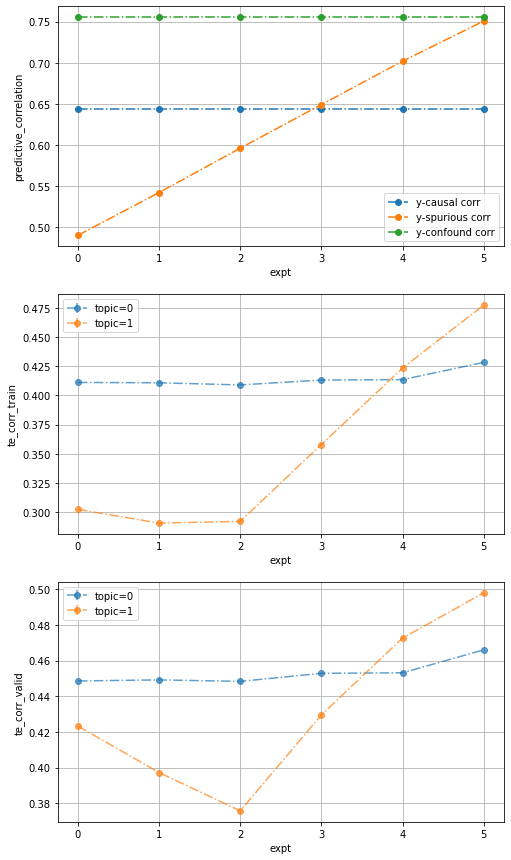

In [10]:
run_list=[2,]
main_enum=10
num_sample=10000

rr_lambda=1
tmle_lambda=1
l2_lambda=1
debug_tidx_list=[0,1]


pvaltsp_list=[0.5,0.6,0.7,0.8,0.9,0.99]


plot_item_list=[
            "predictive_correlation",
#             "te_train",
            "te_corr_train",
#             "te_valid",
            "te_corr_valid",
#             "rr_loss",
#             "reg_loss",
#             "tmle_loss",
#             "l2_loss",
]


plt.rcParams['figure.figsize'] = [8, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),1)

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy3/nlp_logs/cad.toy3s1riesz.rnum({}).sample({}).pvaltsp({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_final(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvaltsp_list,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           plot_item_list=plot_item_list,
    )

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/nlp_toy3/nlp_logs/cad.toy3s1riesz.rnum(0).sample(1000).hlayer(2).pvaltsp(0.5).dtidx(1).rr_lmd(1).tmle_lmd(0).l2_lmd(0.1)/probe_metric_list.json'

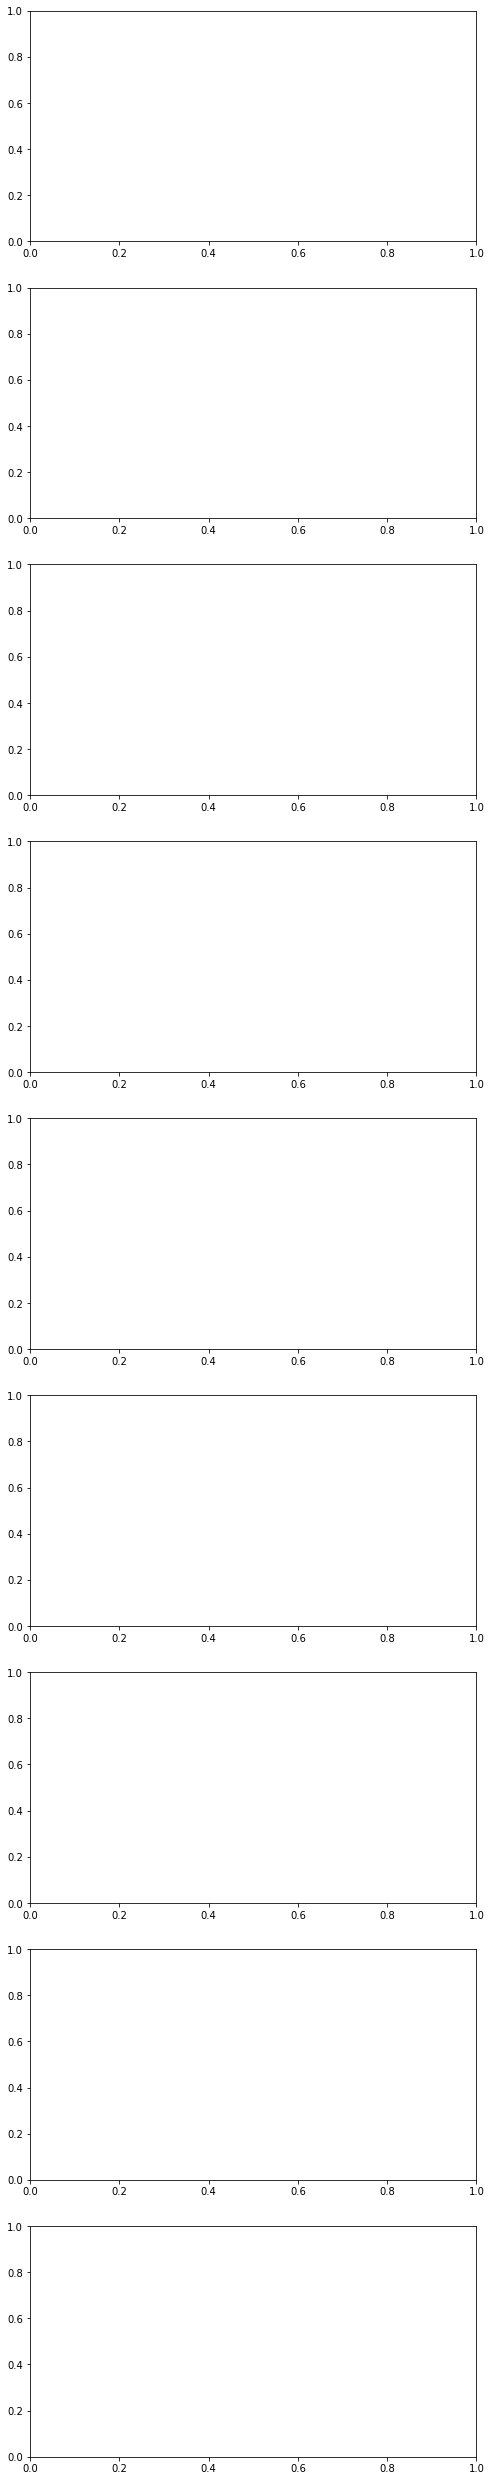

In [30]:
run_list=[0]
main_enum=200
num_sample=1000
hlayer=2

rr_lambda=1
tmle_lambda=0
l2_lambda=0.1
debug_tidx_list=[1]


pvaltsp_list=[0.5,]


plot_item_list=[
            "predictive_correlation",
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
#             "rr_loss",
#             "reg_loss",
#             "tmle_loss",
#             "l2_loss",
            "alpha:tdtidx0-tcf0",
            "alpha:tdtidx0-tcf1",
            "alpha:tdtidx1-tcf0",
            "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [8, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),1)

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy3/nlp_logs/cad.toy3s1riesz.rnum({}).sample({}).hlayer({}).pvaltsp({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_final(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvaltsp_list,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           plot_item_list=plot_item_list,
    )

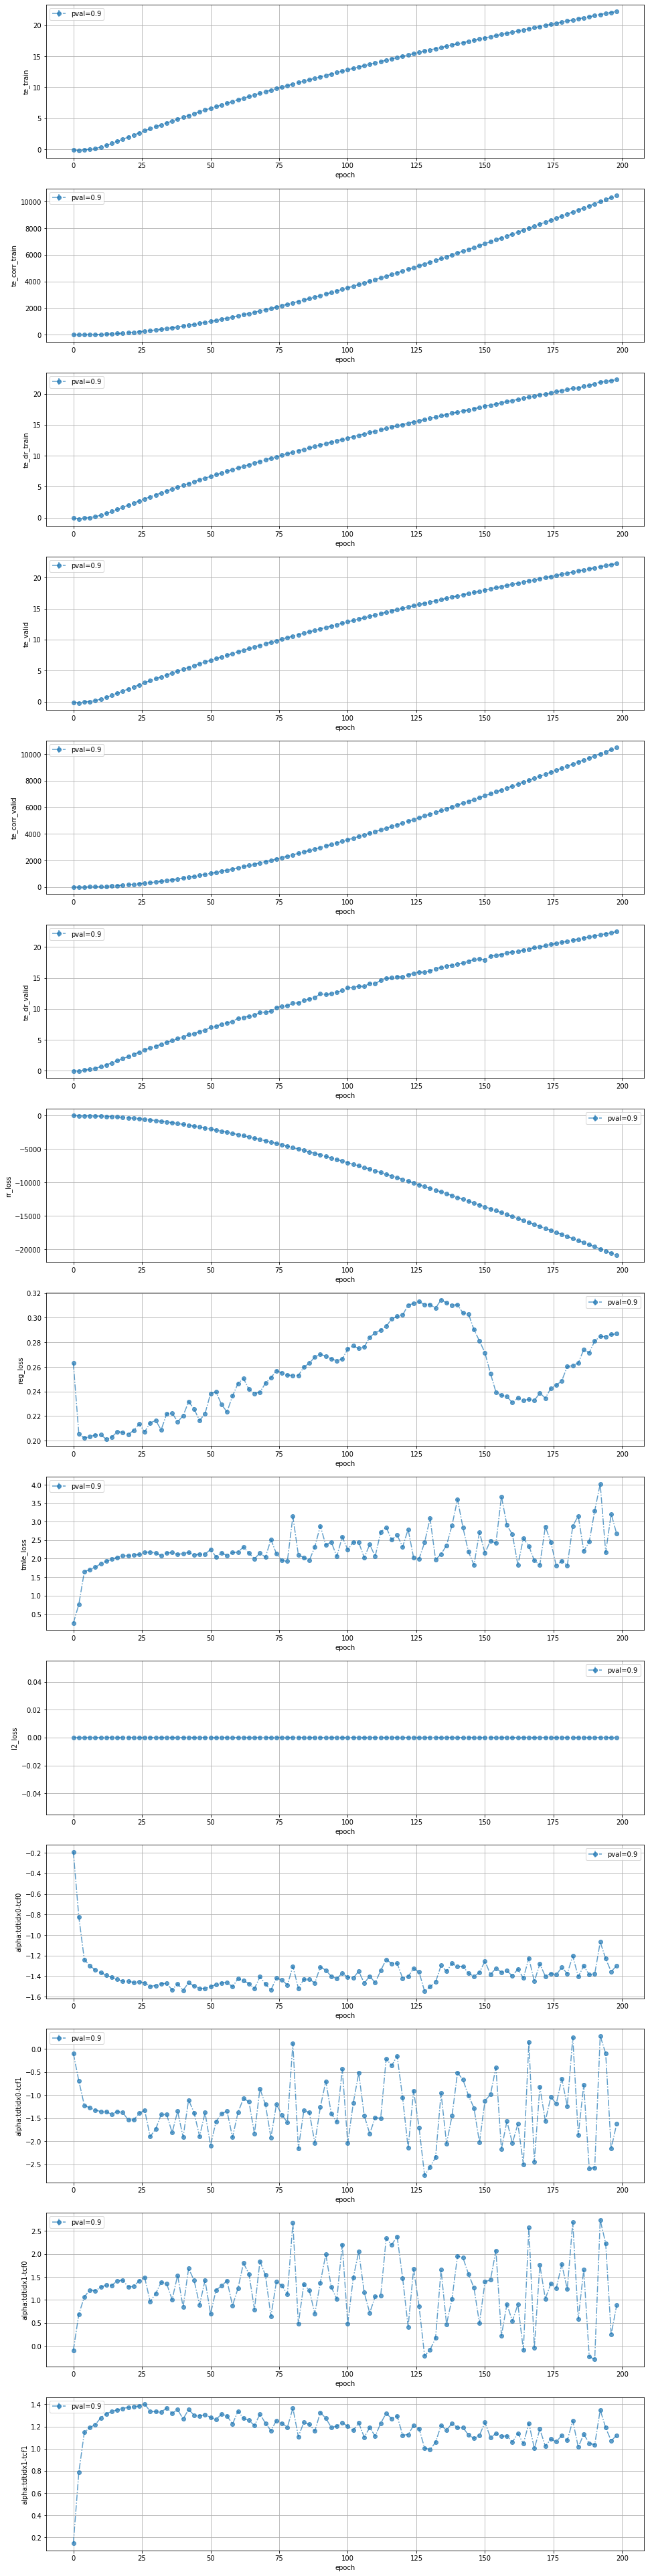

In [37]:
run_list=[0,]
main_enum=200
num_sample=1000
hlayer=1

rr_lambda=1
tmle_lambda=0
l2_lambda=0
debug_tidx_list=[1]

pvaltsp_list=[0.9]


plot_item_list=[
            "te_train",
            "te_corr_train",
            "te_dr_train",
            "te_valid",
            "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "reg_loss",
            "tmle_loss",
            "l2_loss",
            "alpha:tdtidx0-tcf0",
            "alpha:tdtidx0-tcf1",
            "alpha:tdtidx1-tcf0",
            "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(debug_tidx_list))

for debug_tidx in debug_tidx_list:
    fname_pattern= "dataset/nlp_toy3/nlp_logs/cad.toy3s1riesz.rnum({}).sample({}).hlayer({}).pvaltsp({}).dtidx({}).rr_lmd({}).tmle_lmd({}).l2_lmd({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           pval_list=pvaltsp_list,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda
    )